In [1]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

In [2]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day-1)

In [3]:
df = pd.DataFrame(data.DataReader('BSE/BOM502355', 'quandl', start=start, end=end ))    #Balkrishna_Ind

In [4]:
df.head()

,Open,High,Low,Close,WAP,NoofShares,NoofTrades,TotalTurnover,DeliverableQuantity,DeliQtytoTradedQty,SpreadHL,SpreadCO
Date,,,,,,,,,,,,
2018-08-14,1236.10,1343.5,1223.20,1335.25,1307.23,118310.0,4372.0,154658819.0,18597.0,15.72,120.30,99.15
2018-08-13,1260.00,1261.0,1218.50,1227.85,1234.15,35757.0,1304.0,44129655.0,17203.0,48.11,42.50,-32.15
2018-08-10,1248.95,1273.7,1244.00,1252.45,1259.83,25123.0,960.0,31650768.0,3858.0,15.36,29.70,3.50
2018-08-09,1255.00,1265.0,1238.25,1254.70,1252.36,17544.0,906.0,21971485.0,3297.0,18.79,26.75,-0.30
2018-08-08,1220.55,1255.0,1220.55,1247.50,1242.79,18658.0,779.0,23188055.0,3738.0,20.03,34.45,26.95


# Candle Stick Presentation

In [5]:
from matplotlib import dates, ticker
# from matplotlib.finance import candlestick2_ochl
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

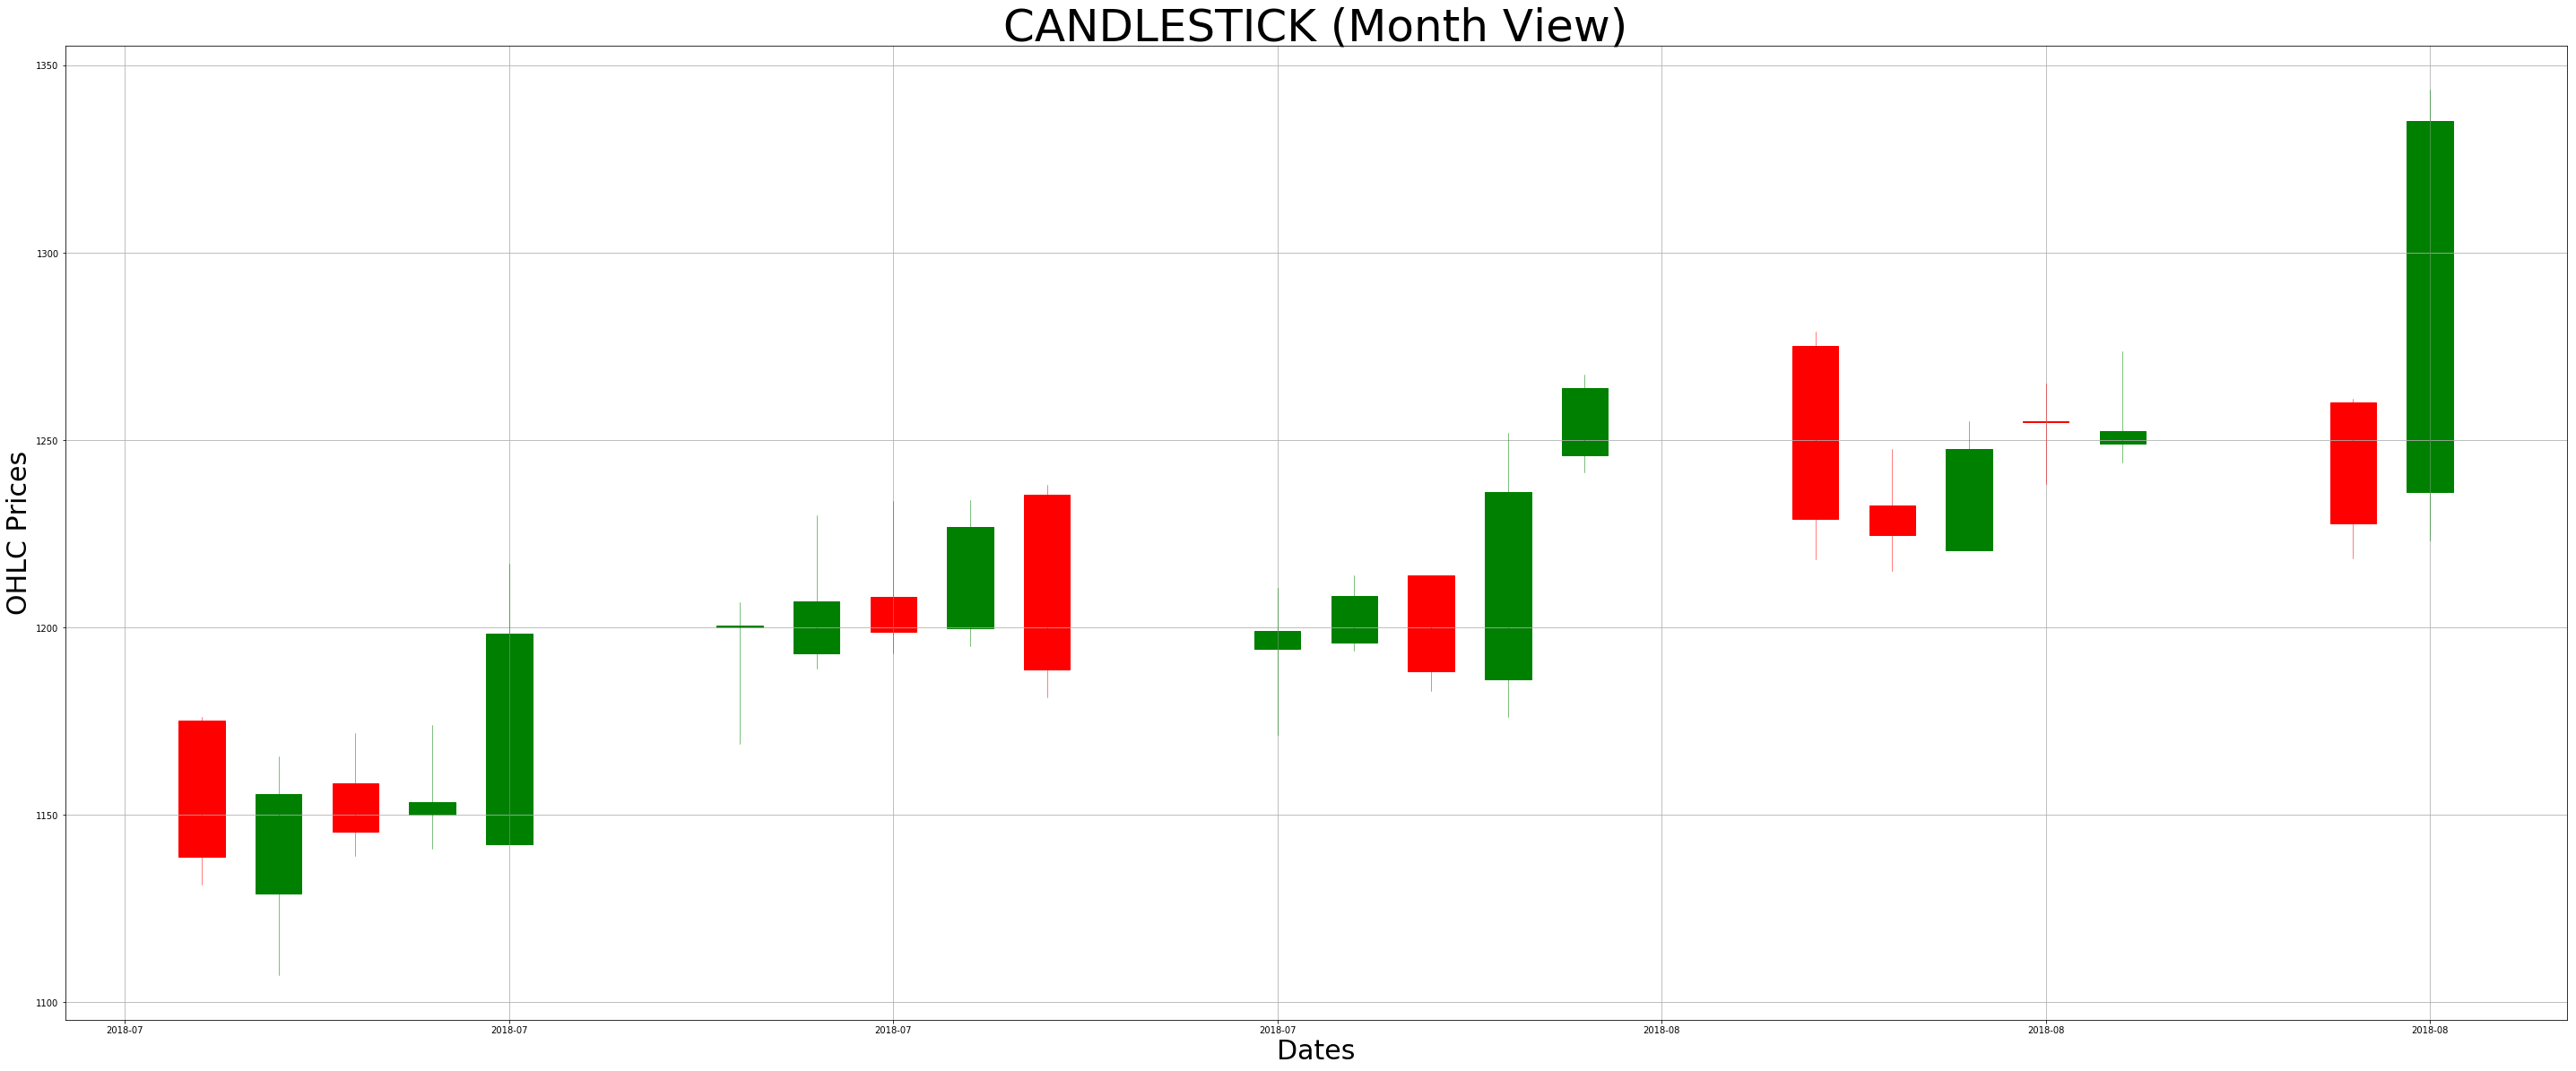

In [6]:
#formating the date
df['Date'] = df.index.map(mdates.date2num)
ohlc =df[['Date','Open','High','Low','Close']]

fig, ax = pt.subplots(figsize = (50,20))

# ploting the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')

#formating the axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlabel('Dates',size=30)
ax.set_ylabel('OHLC Prices', size=30)
ax.set_title('CANDLESTICK (Month View)', size=50)

ax.grid(True)

pt.show()

# Volume

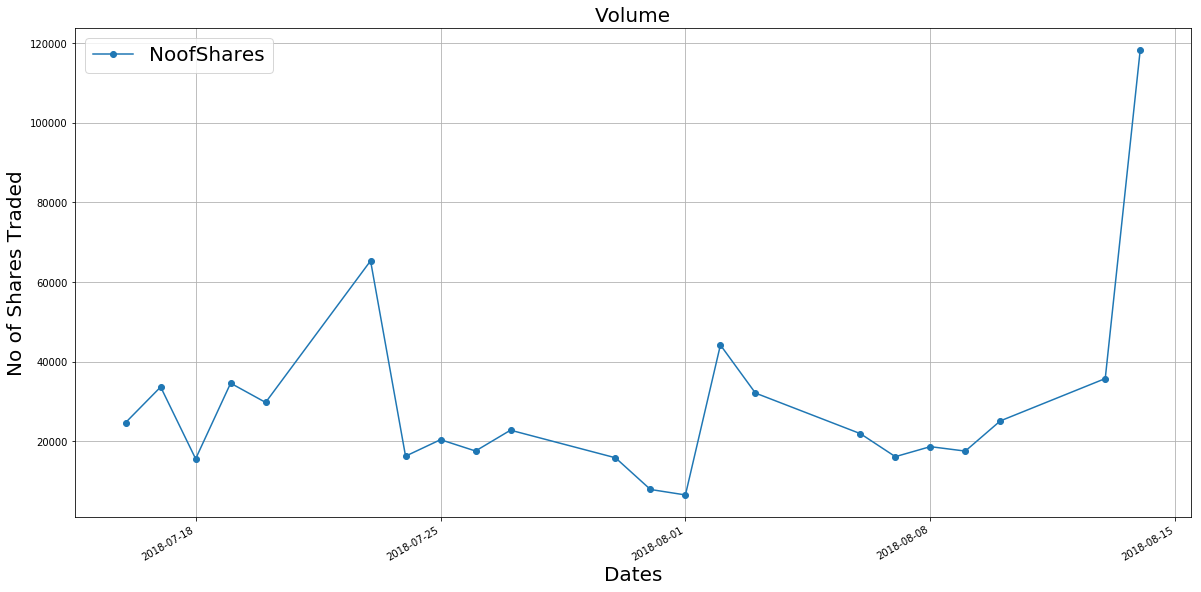

In [7]:
fig, bx = pt.subplots(figsize = (20,10))
df['NoofShares'].plot(legend=True, marker='o')
bx.set_xlabel('Dates',size=30, fontsize=20)
bx.set_ylabel('No of Shares Traded', size=20)
bx.set_title('Volume', size=20)
pt.legend(prop={'size':20})
bx.grid(True)
pt.show()

# Volume Weighted Avg Prices and Comparision

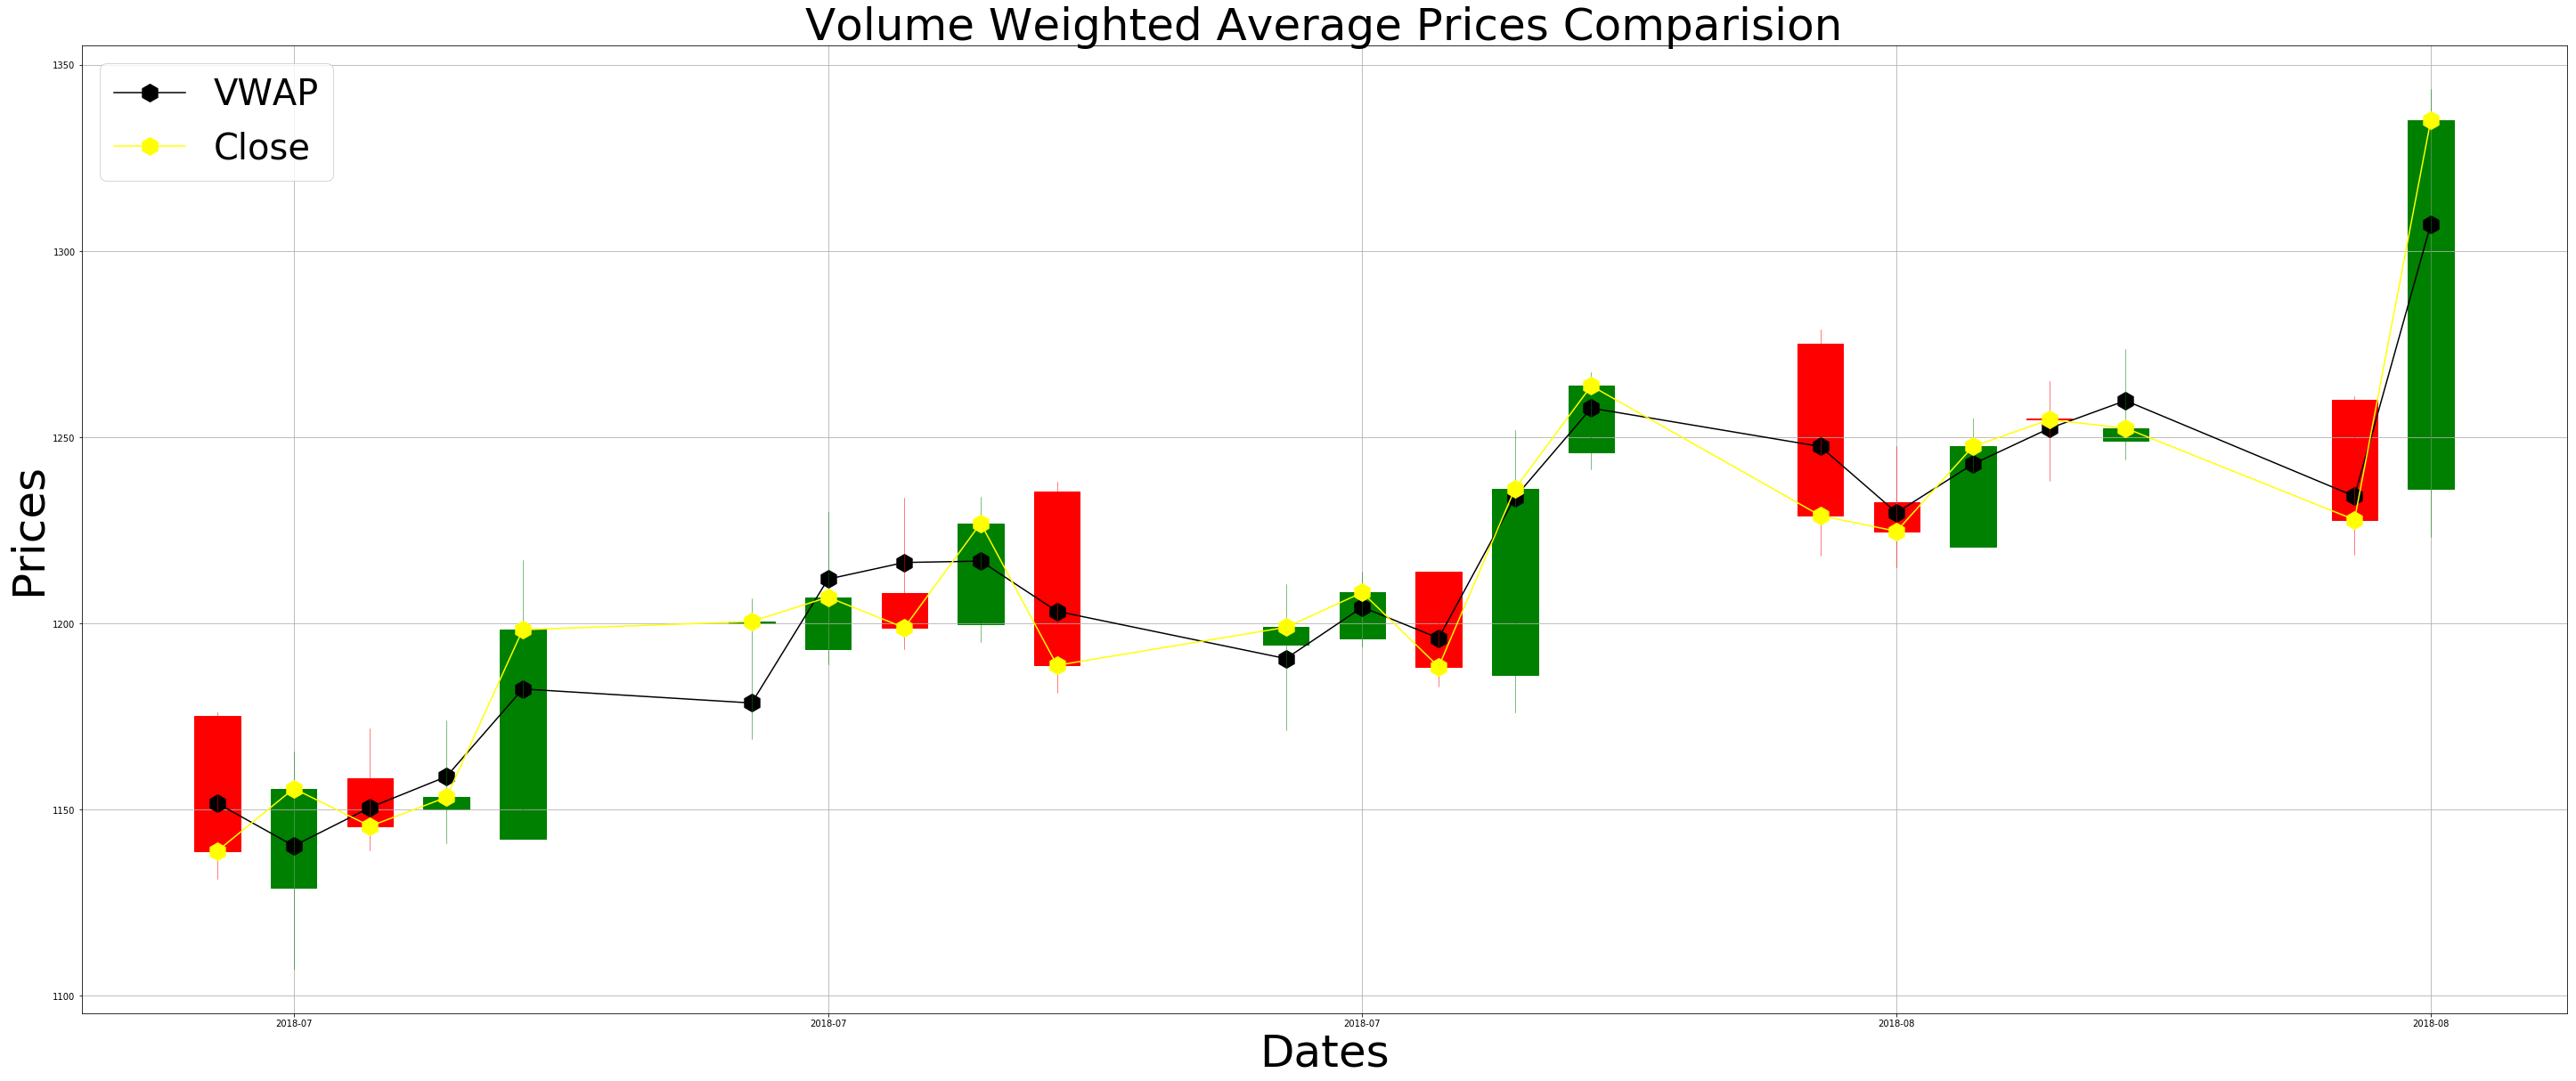

In [8]:
fig, Qx = pt.subplots(figsize = (50,20))
Qx.plot(df.index, df['WAP'], color = 'black', label = 'VWAP', marker='h', markersize=20)
# plot the candlesticks
candlestick_ohlc(Qx, ohlc.values, width=.6, colorup='green', colordown='red')

Qx.plot(df.index, df['Close'], color = 'yellow', label = 'Close', marker='h', markersize=20)
Qx.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
Qx.set_xlabel('Dates',size=50)
Qx.set_ylabel('Prices', size=50)
Qx.set_title('Volume Weighted Average Prices Comparision', size=50)
Qx.grid(True)
Qx.legend()
pt.legend(prop={'size':40})
pt.show()

# Total Turnover

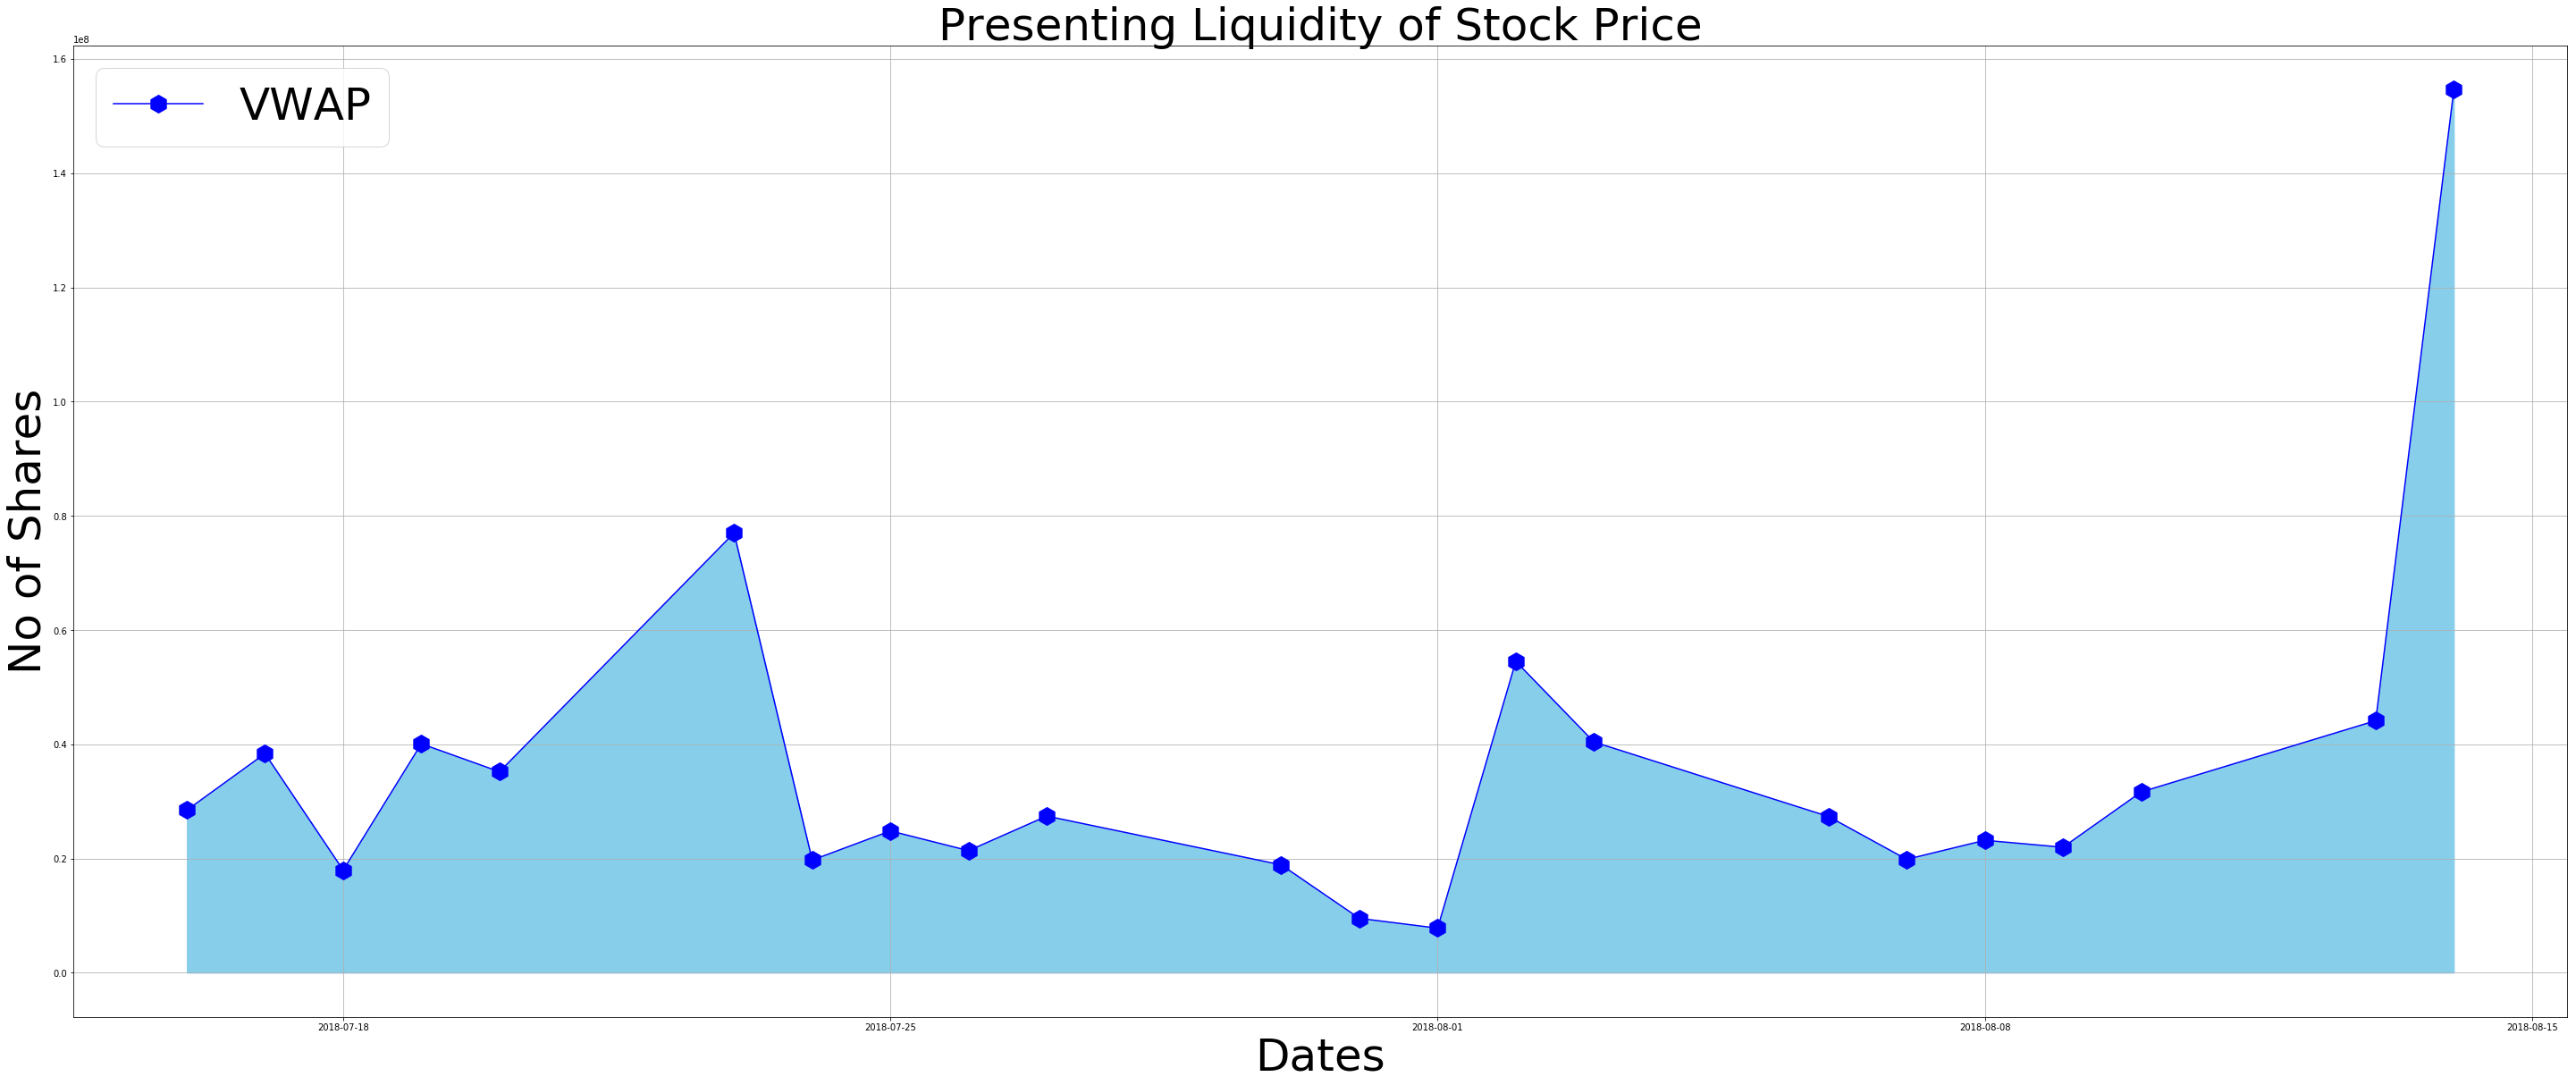

In [9]:
fig, wx = pt.subplots(figsize = (50,20))
wx.plot(df.index, df['TotalTurnover'], color = 'blue', label = 'VWAP', marker='h', markersize=20)
wx.set_xlabel('Dates',size=50)
wx.set_ylabel('No of Shares', size=50)
wx.set_title('Presenting Liquidity of Stock Price', size=50)
wx.fill_between(df.index,df['TotalTurnover'],color='skyblue')
# other parameters
wx.grid(True)
wx.legend()
pt.legend(prop={'size':50})

# Deliverable Quantity

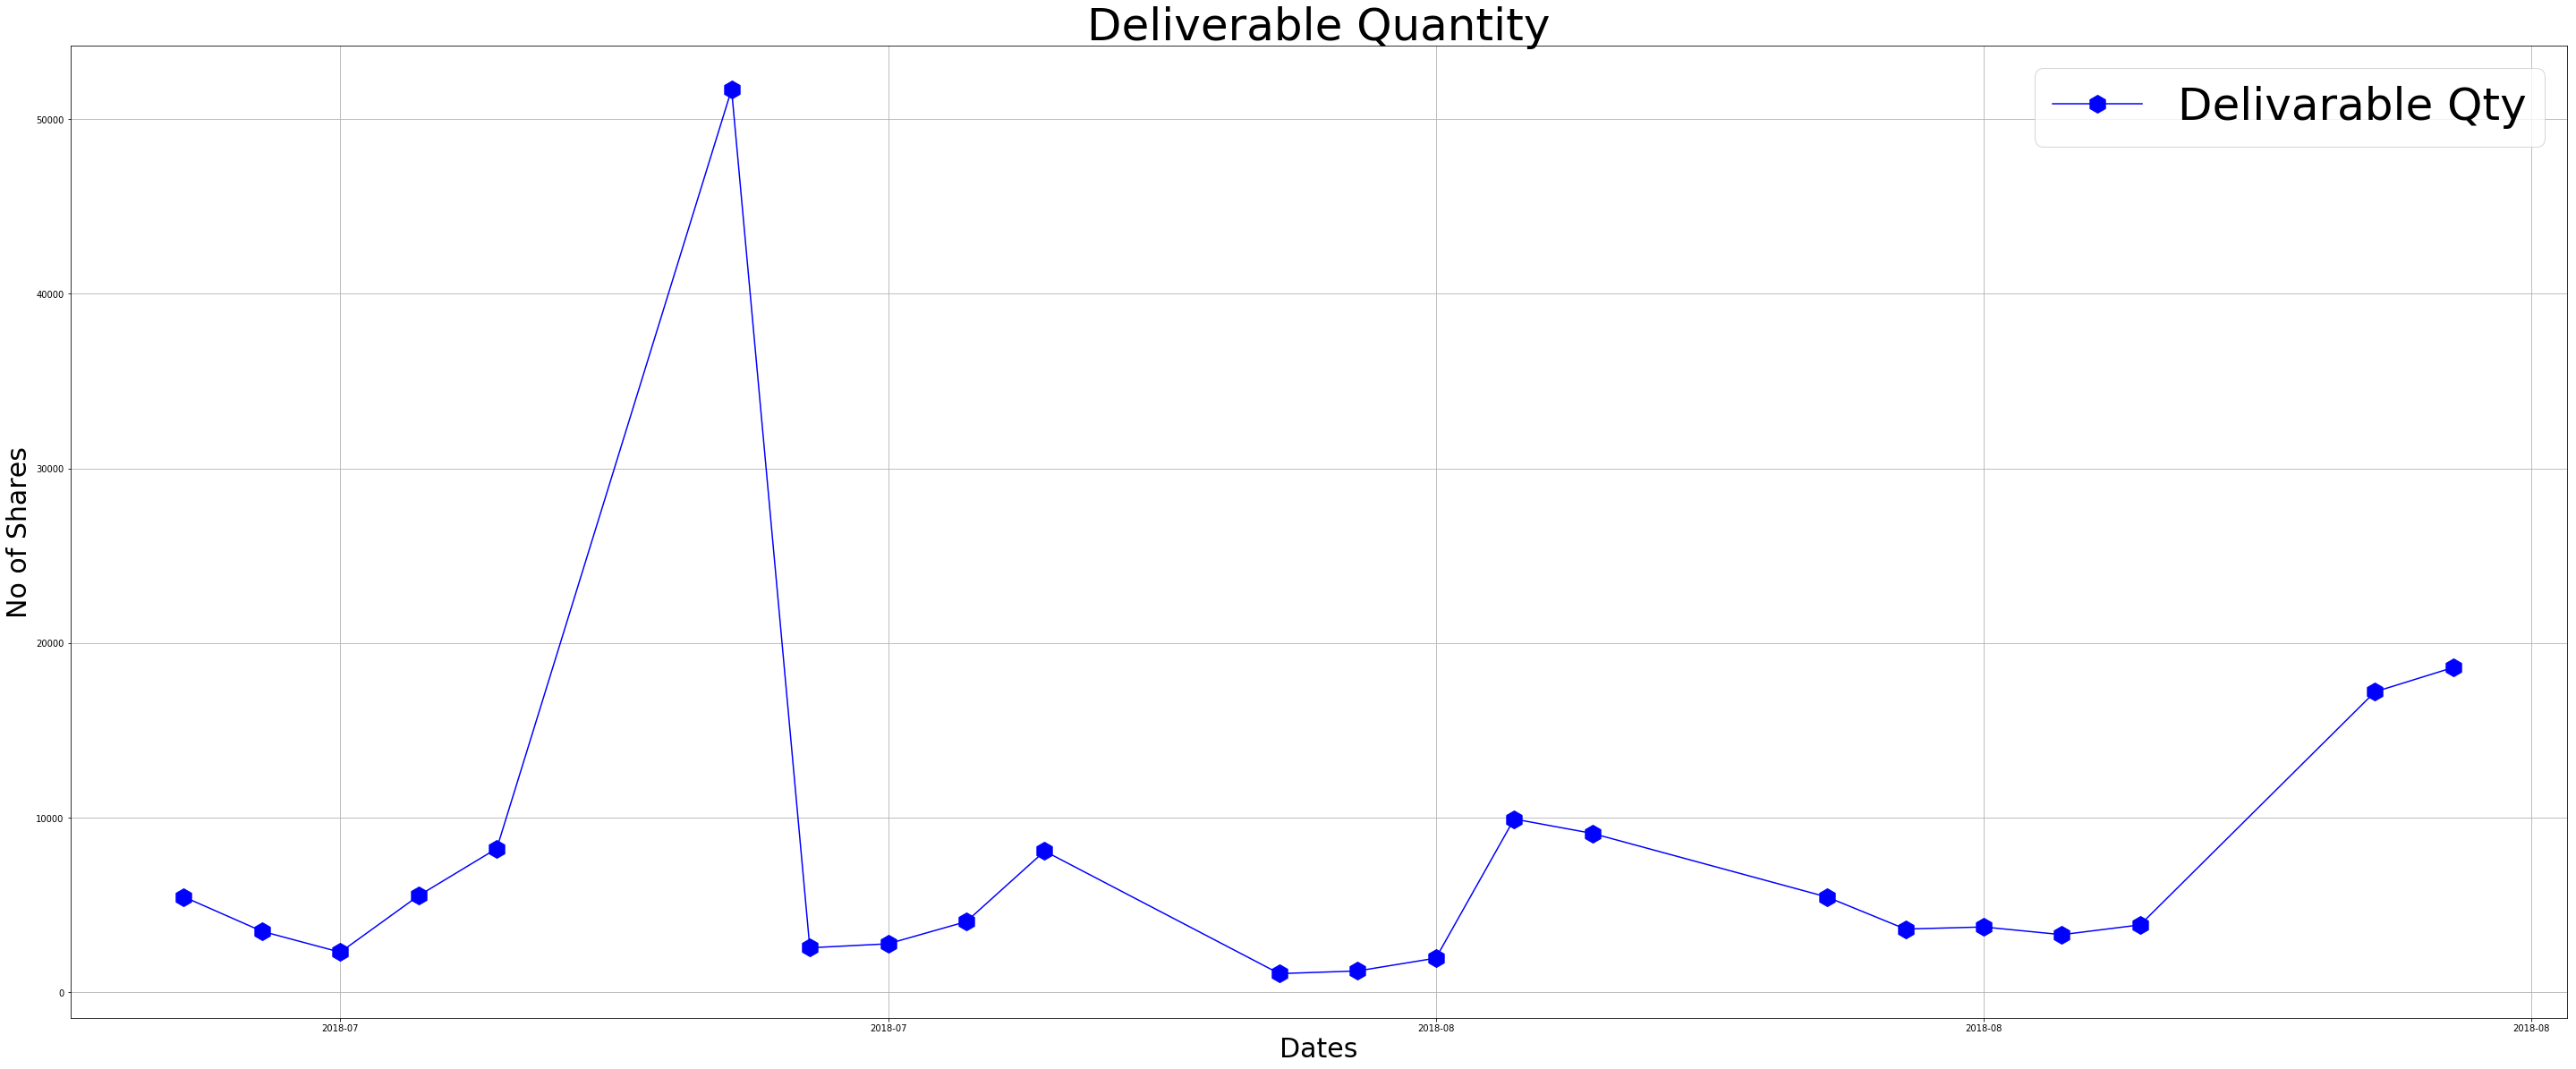

In [10]:
fig, gx = pt.subplots(figsize = (50,20))
gx.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
gx.plot(df.index, df['DeliverableQuantity'], color = 'blue', label = 'Delivarable Qty', marker='h', markersize=20)
gx.set_xlabel('Dates',size=30, fontsize=30)
gx.set_ylabel('No of Shares', size=30)
gx.set_title('Deliverable Quantity', size=50)

# other parameters
gx.grid(True)
gx.legend()
pt.legend(prop={'size':50})

# Spread - Bid and Ask Price

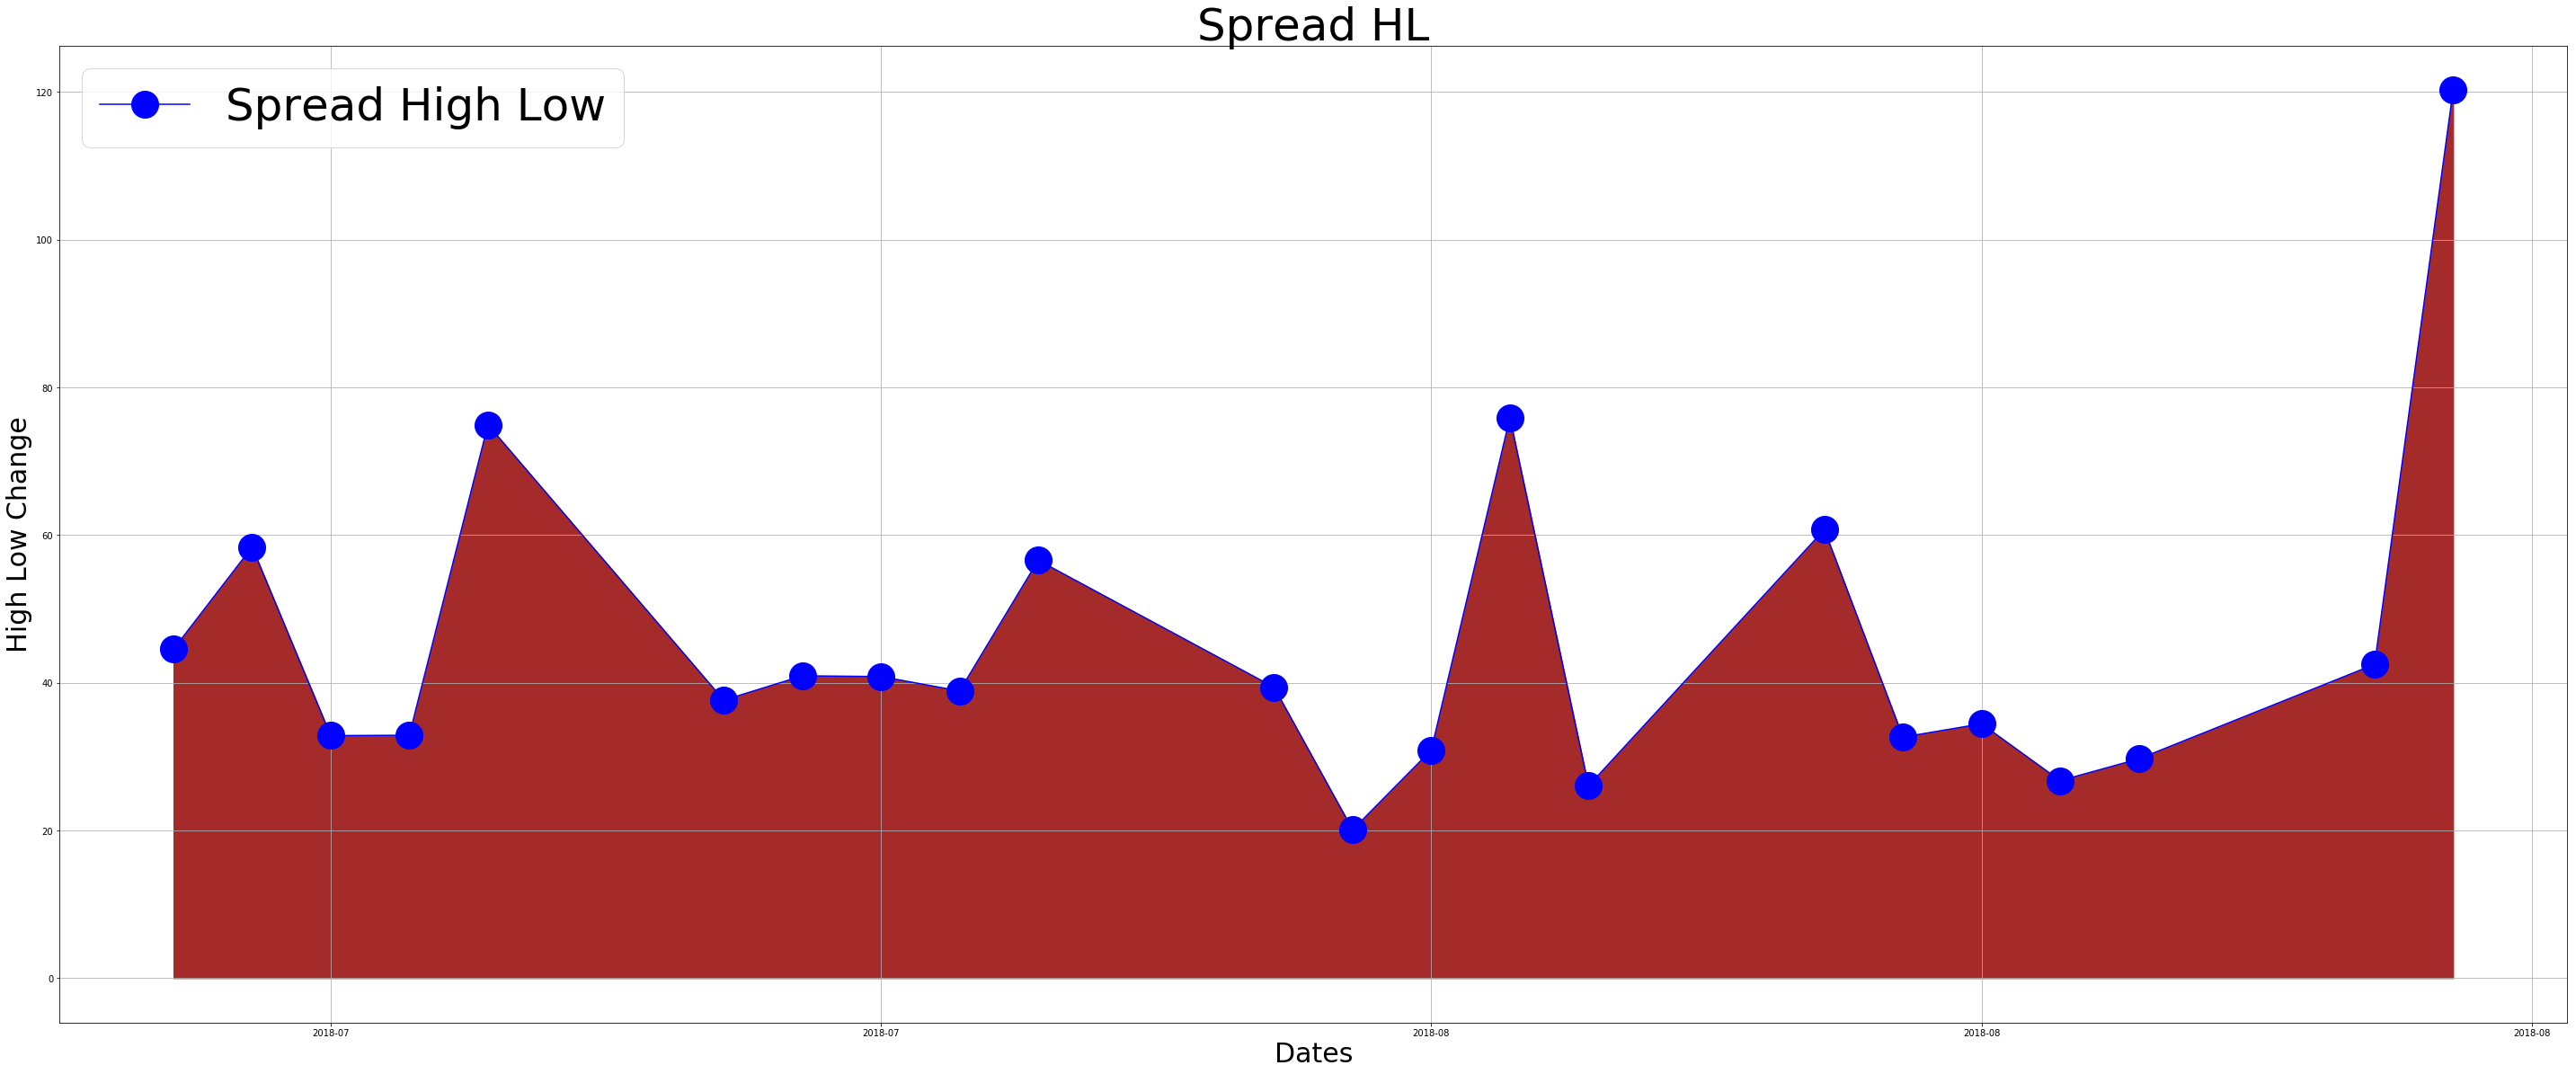

In [11]:
fig, lx = pt.subplots(figsize = (50,20))
lx.plot(df.index, df['SpreadHL'], color = 'blue', label = 'Spread High Low', marker='o', markersize=30)
lx.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
lx.fill_between(df.index,df['SpreadHL'],color='brown')
lx.set_xlabel('Dates',size=30, fontsize=30)
lx.set_ylabel('High Low Change', size=30)
lx.set_title('Spread HL', size=50)

# other parameters
lx.grid(True)
lx.legend()
pt.legend(prop={'size':50})

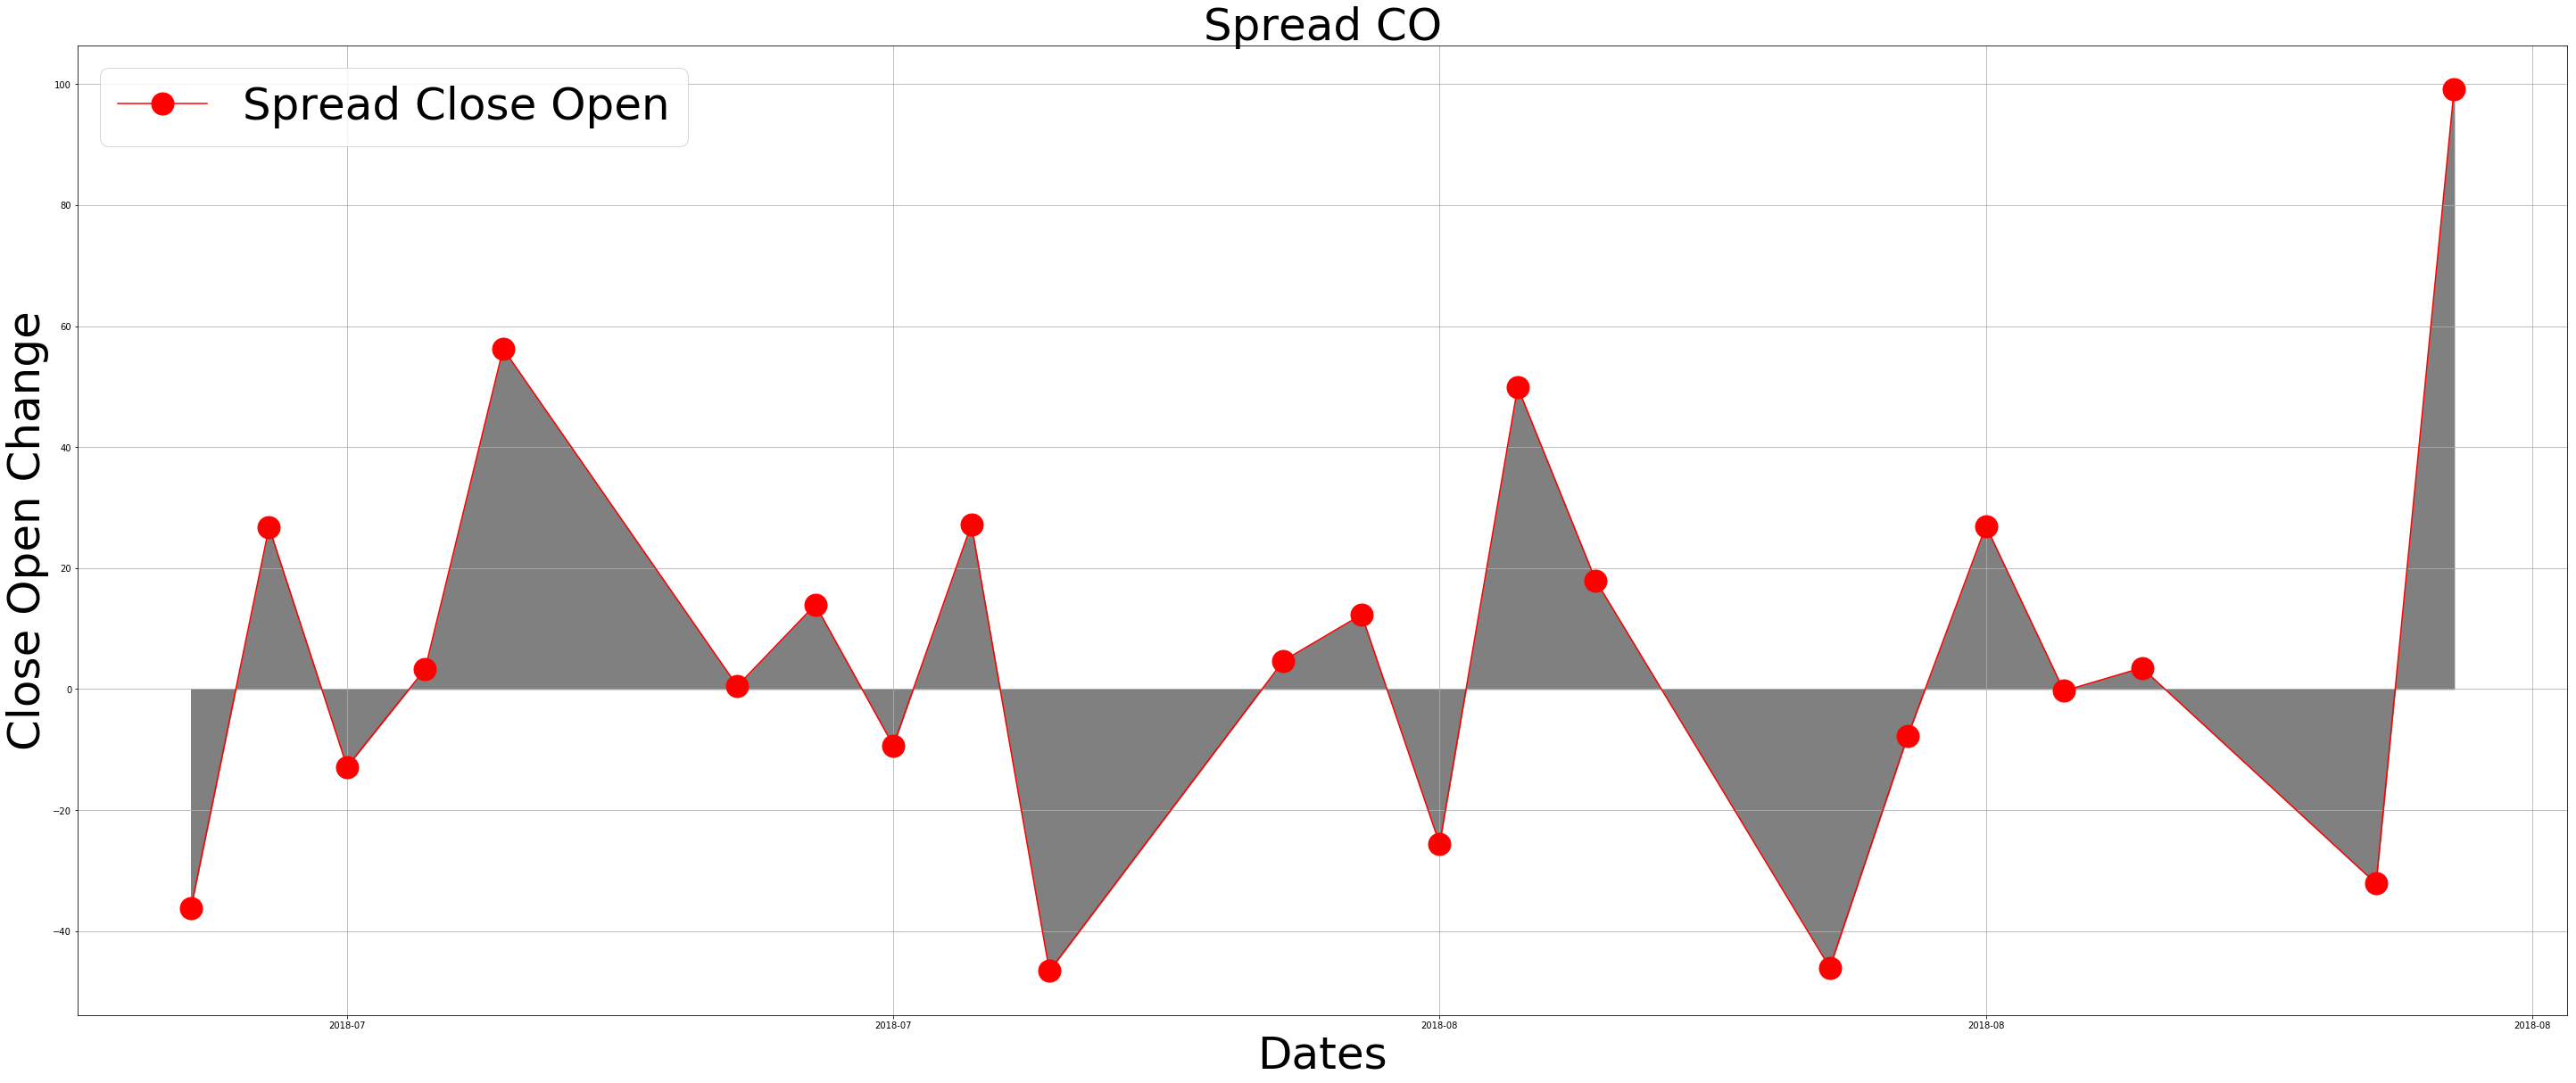

In [12]:
fig, mx = pt.subplots(figsize = (50,20))
mx.plot(df.index, df['SpreadCO'], color = 'red', label = 'Spread Close Open', marker='o', markersize=25)
mx.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
mx.fill_between(df.index,df['SpreadCO'],color='grey')
mx.set_xlabel('Dates',size=50, fontsize=50)
mx.set_ylabel('Close Open Change', size=50)
mx.set_title('Spread CO', size=50)

# other parameters
mx.grid(True)
mx.legend()
pt.legend(prop={'size':50})

# Moving Averages

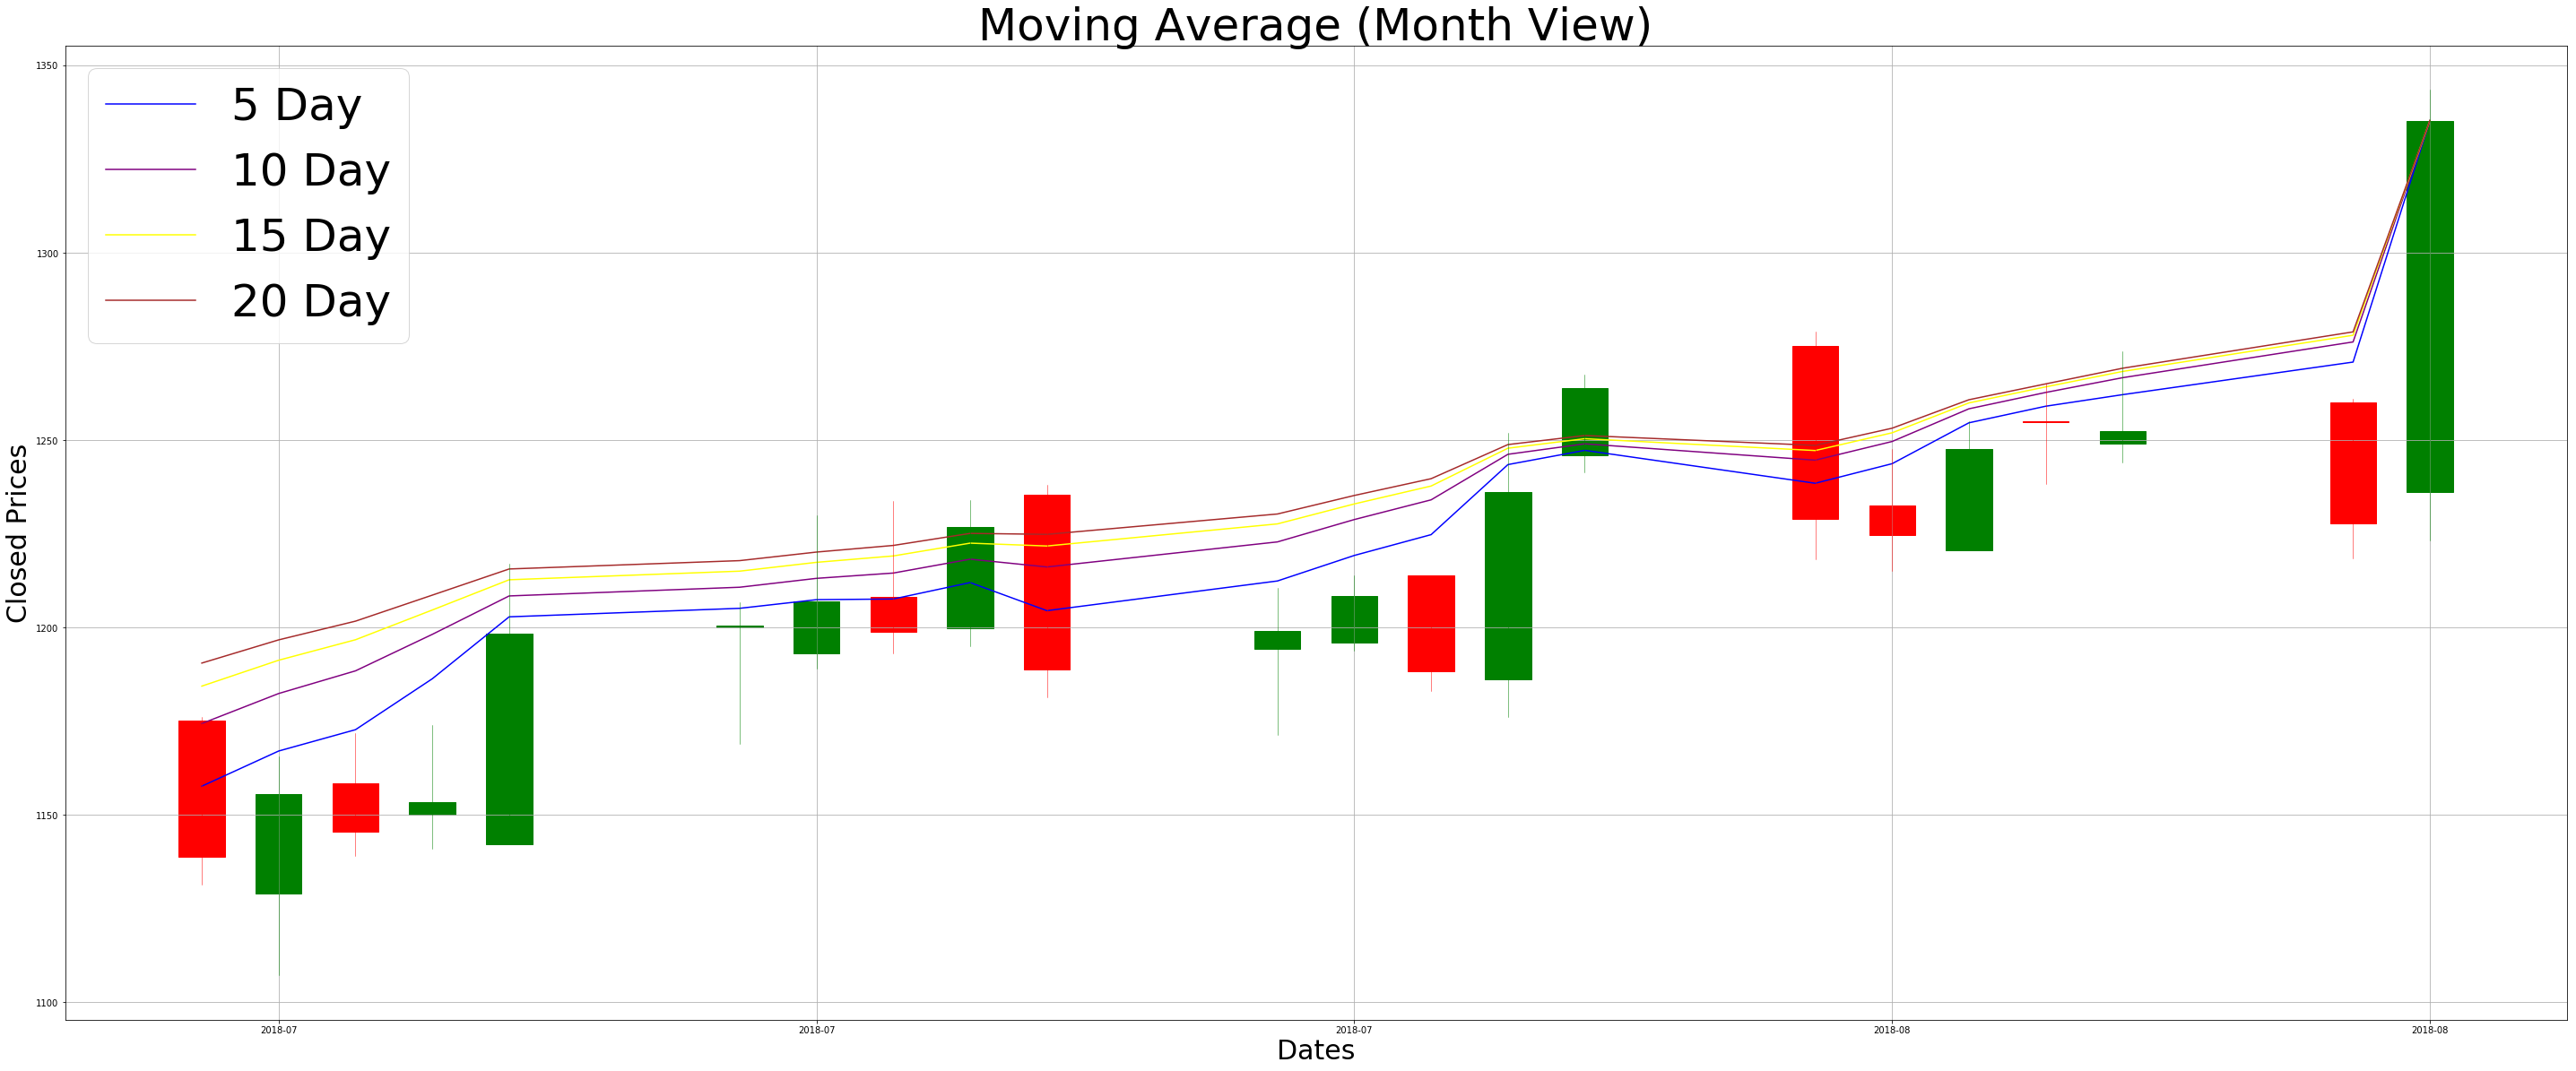

In [13]:
fig, ax = pt.subplots(figsize = (50,20))
df['ema5'] = df['Close'].ewm(span=5, adjust=True).mean()
df['ema10'] = df['Close'].ewm(span=10, adjust=True).mean()
df['ema15'] = df['Close'].ewm(span=15, adjust=True).mean()
df['ema20'] = df['Close'].ewm(span=20, adjust=True).mean()

df = df[df.index > start]

# plot the moving average lines
ax.plot(df.index, df['ema5'], color = 'blue', label = '5 Day')
ax.plot(df.index, df['ema10'], color = 'purple', label = '10 Day')
ax.plot(df.index, df['ema15'], color = 'yellow', label = '15 Day')
ax.plot(df.index, df['ema20'], color = 'brown', label = '20 Day')

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlabel('Dates',size=30, fontsize=30)
ax.set_ylabel('Closed Prices', size=30)
ax.set_title('Moving Average (Month View)', size=50)

# other parameters
ax.grid(True)
ax.legend()
pt.legend(prop={'size':50})

pt.show()

# Daily Return Analysis

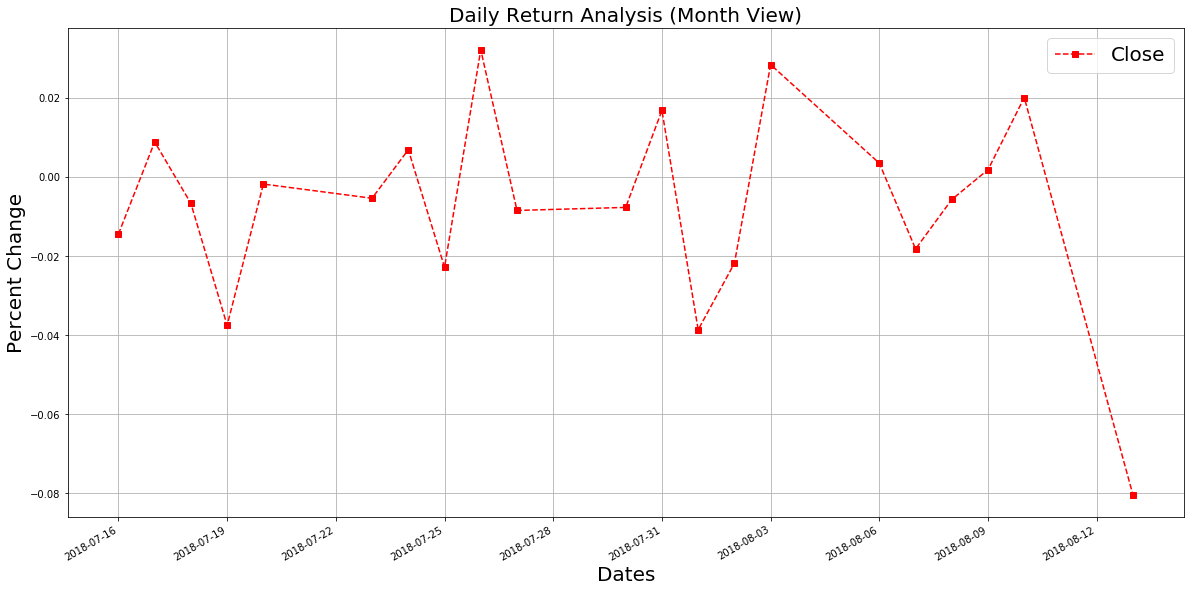

In [14]:
fig, cx = pt.subplots(figsize = (20,10))
(df['Close'].pct_change()).plot( legend=True, linestyle='--', marker='s', color="red")
cx.set_xlabel('Dates',size=30, fontsize=20)
cx.set_ylabel('Percent Change', size=20)
cx.set_title('Daily Return Analysis (Month View)', size=20)

# other parameters
cx.grid(True)
cx.legend()
pt.legend(prop={'size':20})